In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeRegressor

In [2]:
df = pd.read_csv("expt_bandgap_dataset.csv")
df = df.drop(['formula'],axis=1)

In [31]:
X = df.drop(['gap expt'],axis=1).values
y = df['gap expt'].values

In [47]:
tree_model = DecisionTreeRegressor(random_state=42)

scores = cross_val_score(tree_model, X, y, cv=5, scoring="neg_mean_absolute_error")
mae_scores = -scores
mae_scores
print(f"Mean absolute error: {mae_scores.mean():.2f} (+/- {mae_scores.std() * 2:.2f})")

Mean absolute error: 0.62 (+/- 0.27)


In [48]:
#random forest with default parameters
#note- tuning hyperparameters made no difference to mae

rf_model = RandomForestRegressor(random_state=42)

scores = cross_val_score(rf_model, X, y, cv=5, scoring="neg_mean_absolute_error")
mae_scores = -scores
mae_scores
print(f"Mean absolute error: {mae_scores.mean():.2f} (+/- {mae_scores.std() * 2:.2f})")


Mean absolute error: 0.55 (+/- 0.28)


In [ ]:
#XGBoost without tuning - no real improvement on random forest

xgb_model = XGBRegressor(random_state=42)

scores = cross_val_score(xgb_model, X, y, cv=5, scoring="neg_mean_absolute_error")
mae_scores = -scores
mae_scores
print(f"Mean absolute error: {mae_scores.mean():.2f} (+/- {mae_scores.std() * 2:.2f})")

Mean absolute error: 0.54 (+/- 0.19)


In [ ]:
# tune hyperparameters
# this approach uses randomsearch which randomly goes through combinations of parameters
# for different datasets different tuning methods may be better
# BO - best for slow training (large dataset) and want to minimise the number of times you train
# grid search - best for small hyperparameter space

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0]
}

random_search = RandomizedSearchCV(
    xgb_model, param_dist, n_iter=10, cv=5, random_state=42
)

random_search.fit(X, y)

print(f"Best hyperparameters: {random_search.best_params_}")
print(f"Best mean absolute error: {-random_search.best_score_:.2f}")

Best hyperparameters: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1}
Best mean absolute error: -0.65


In [ ]:
#XGBoost with tuned hyperparameters

xgb_model = XGBRegressor(n_estimators=200,subsample=0.8,max_depth=7,learning_rate=0.1,random_state=42)

scores = cross_val_score(xgb_model, X, y, cv=5, scoring="neg_mean_absolute_error")
mae_scores = -scores
mae_scores
print(f"Mean absolute error: {mae_scores.mean():.2f} (+/- {mae_scores.std() * 2:.2f})")

Mean absolute error: 0.49 (+/- 0.19)


Text(0.5, 1.0, 'Actual by predicted')

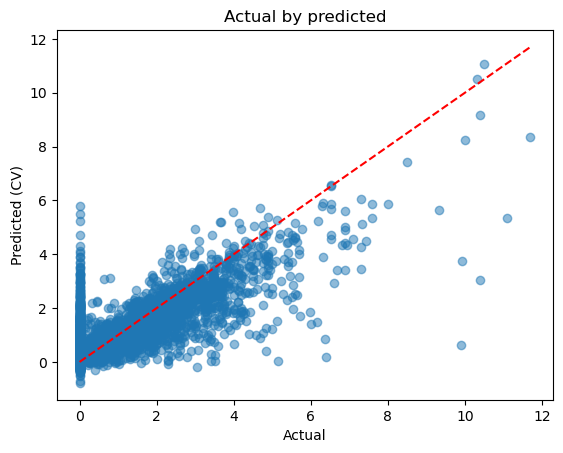

In [42]:
from sklearn.model_selection import cross_val_predict

# predictions using CV
y_pred = cross_val_predict(xgb_model, X, y, cv=5)

# actual by predicted plot
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted (CV)')
plt.title('Actual by predicted')

Text(0.5, 1.0, 'Residual Plot')

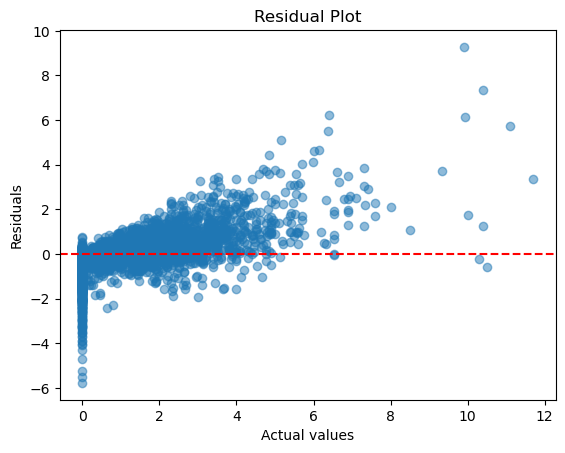

In [44]:
residuals = y - y_pred
plt.scatter(y, residuals, alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

Text(0.5, 1.0, 'Residual Distribution')

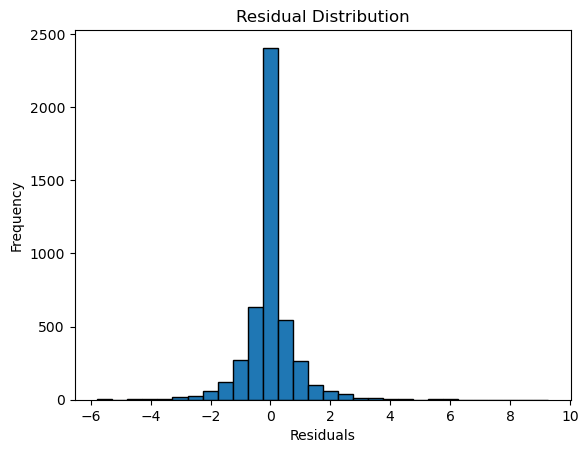

In [45]:
plt.hist(residuals, bins=30, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Distribution')